# Sentiment Analysis on Movie Reviews

## Overview

This notebook focuses on making sentiment prediction on dataset of movie reviews extracted from IMDB

## Data Set

The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews. The 25,000 review labeled training set does not include any of the same movies as the 25,000 review test set. In addition, there are another 50,000 IMDB reviews provided without any rating labels.

## Data fields

## What is Sentiment Analysis?

Sentiment Analysis is the process of determining whether a piece of writing is positive, negative or neutral. A sentiment analysis system for text analysis combines natural language processing (NLP) and machine learning techniques to assign weighted sentiment scores to the entities, topics, themes and categories within a sentence or phrase.

## Importing the data

In [1]:
import pandas as pd

train_data = pd.read_csv("labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)
test_data = pd.read_csv("testData.tsv", header=0, delimiter="\t", quoting=3)

In [2]:
train_data.head()

id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.0+ KB


In [4]:
train_data["review"][1]

'"\\"The Classic War of the Worlds\\" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells\' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \\"critics\\" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \\"critics\\". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells\' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \\"critics\\" perceive to be its shortcomings."'

In [5]:
test_data.head()

id                                             review
0  "12311_10"  "Naturally in a film who's main themes are of ...
1    "8348_2"  "This movie is a disaster within a disaster fi...
2    "5828_4"  "All in all, this is a movie for kids. We saw ...
3    "7186_2"  "Afraid of the Dark left me with the impressio...
4   "12128_7"  "A very accurate depiction of small time mob l...

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
id        25000 non-null object
review    25000 non-null object
dtypes: object(2)
memory usage: 390.7+ KB


In [7]:
train_data["review"][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

## Data Cleaning and Text Preprocessing

Removing html tags, punctuations, stopwords and stemming the reviews using packages dealing with regular expressions, html. 
We will also tokenize the reviews, remove stop words and perform stemming

In [8]:
from bs4 import BeautifulSoup
import string
import re

import nltk
from nltk.corpus import stopwords
snow = nltk.stem.SnowballStemmer('english')

In [9]:
def clean_review(raw_review):
    review_text = BeautifulSoup(raw_review).get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))
    clean_review = [snow.stem(word) for word in words if word not in stops]   # Stemming and removing stopwords
    return( " ".join(clean_review))    

In [10]:
train_data["clean_review"] = train_data["review"].apply(clean_review)
test_data["clean_review"] = test_data["review"].apply(clean_review)

In [11]:
train_data.head()

id  sentiment                                             review  \
0  "5814_8"          1  "With all this stuff going down at the moment ...   
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...   
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...   
3  "3630_4"          0  "It must be assumed that those who praised thi...   
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...   

                                        clean_review  
0  stuff go moment mj start listen music watch od...  
1  classic war world timothi hine entertain film ...  
2  film start manag nichola bell give welcom inve...  
3  must assum prais film greatest film opera ever...  
4  superbl trashi wondrous unpretenti exploit hoo...

In [12]:
train_data["clean_review"][1]

'classic war world timothi hine entertain film obvious goe great effort length faith recreat h g well classic book mr hine succeed watch film appreci fact standard predict hollywood fare come everi year e g spielberg version tom cruis slightest resembl book obvious everyon look differ thing movi envis amateur critic look critic everyth other rate movi import base like entertain peopl never agre critic enjoy effort mr hine put faith h g well classic novel found entertain made easi overlook critic perceiv shortcom'

In [13]:
test_data.head()

id                                             review  \
0  "12311_10"  "Naturally in a film who's main themes are of ...   
1    "8348_2"  "This movie is a disaster within a disaster fi...   
2    "5828_4"  "All in all, this is a movie for kids. We saw ...   
3    "7186_2"  "Afraid of the Dark left me with the impressio...   
4   "12128_7"  "A very accurate depiction of small time mob l...   

                                        clean_review  
0  natur film main theme mortal nostalgia loss in...  
1  movi disast within disast film full great acti...  
2  movi kid saw tonight child love one point kid ...  
3  afraid dark left impress sever differ screenpl...  
4  accur depict small time mob life film new jers...

In [14]:
test_data["clean_review"][0]

'natur film main theme mortal nostalgia loss innoc perhap surpris rate high older viewer younger one howev craftsmanship complet film anyon enjoy pace steadi constant charact full engag relationship interact natur show need flood tear show emot scream show fear shout show disput violenc show anger natur joyc short stori lend film readi made structur perfect polish diamond small chang huston make inclus poem fit neat truli masterpiec tact subtleti overwhelm beauti'

## Vectorize words using TF-IDF technique

When performing text vectorization, one common approach is to use a vector of word counts. Instead of weighting each word by its count within the document, though, another approach that’s often more helpful is to weight each word by its tf-idf (term frequency-inverse document frequency) score, defined as follows:

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer(
    sublinear_tf = True,
    strip_accents = "ascii",
    analyzer = "word",
    stop_words = "english",
    ngram_range = (1, 1),
    max_features = 10000)

In [16]:
word_vectorizer.fit(train_data["clean_review"] + test_data["clean_review"])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='ascii', sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [17]:
word_vectorizer.get_feature_names()

['aamir',
 'aaron',
 'ab',
 'abandon',
 'abba',
 'abbey',
 'abbi',
 'abbot',
 'abbott',
 'abc',
 'abduct',
 'abe',
 'abid',
 'abigail',
 'abil',
 'abl',
 'abli',
 'abnorm',
 'aboard',
 'abomin',
 'aborigin',
 'abort',
 'abound',
 'abraham',
 'abroad',
 'abrupt',
 'absenc',
 'absent',
 'absolut',
 'absorb',
 'abstract',
 'absurd',
 'absurdist',
 'abu',
 'abund',
 'abus',
 'abysm',
 'abyss',
 'academ',
 'academi',
 'acceler',
 'accent',
 'accentu',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accolad',
 'accommod',
 'accompani',
 'accomplic',
 'accomplish',
 'accord',
 'account',
 'accumul',
 'accur',
 'accuraci',
 'accus',
 'accustom',
 'ace',
 'ach',
 'achiev',
 'achill',
 'acid',
 'acknowledg',
 'acquaint',
 'acquir',
 'acquit',
 'acr',
 'acrobat',
 'act',
 'action',
 'activ',
 'activist',
 'actor',
 'actress',
 'actual',
 'ad',
 'ada',
 'adam',
 'adamson',
 'adapt',
 'add',
 'addict',
 'addit',
 'address',
 'adel',
 'adelaid',
 'adept',
 'adequ',
 'adher',
 'adject',
 '

At this point, we have numeric training features from the Bag of Words and the original sentiment labels for each feature vector, so let's do some supervised learning! Before that we will split train data and test data using sklearns model selection

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = word_vectorizer.transform(train_data["clean_review"])
Y = train_data['sentiment']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.25)
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(18750, 10000) (6250, 10000) (18750,) (6250,)


## Model Training and Evaluation

### Applying Logistic regression learning method

Here we are using Logistic regression learning method on the training features

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logistic_regression = LogisticRegression(solver='lbfgs')
logistic_regression.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
prediction_lr = logistic_regression.predict(X_test)

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [25]:
print(classification_report(prediction_lr, Y_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3015
           1       0.91      0.86      0.88      3235

   micro avg       0.88      0.88      0.88      6250
   macro avg       0.88      0.88      0.88      6250
weighted avg       0.88      0.88      0.88      6250



In [26]:
score_lr = logistic_regression.score(X_test, Y_test)
print("Accuracy Score: " + str(score_lr))

Accuracy Score: 0.8824


In [27]:
cm_lr = confusion_matrix(Y_test, prediction_lr)
print(cm_lr)

[[2740  460]
 [ 275 2775]]


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

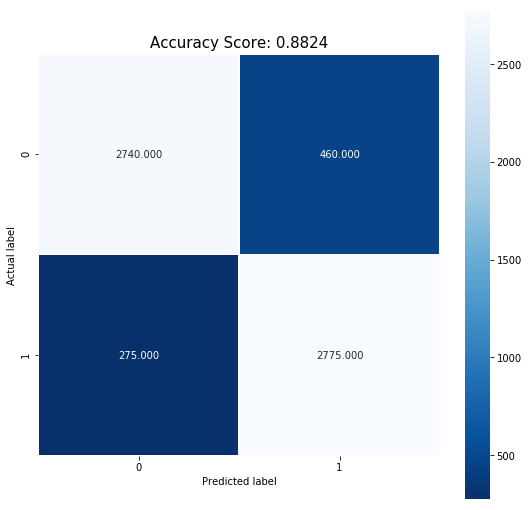

In [29]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_lr, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_lr)
plt.title(all_sample_title, size = 15);

### Applying Random Forest Classifier method

Here we are using Random Forest Classifier learning method on the training features

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
random_forest_classifier = RandomForestClassifier(n_estimators=100)
random_forest_classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
prediction_rfc = random_forest_classifier.predict(X_test)
print(classification_report(prediction_rfc, Y_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      3153
           1       0.85      0.84      0.85      3097

   micro avg       0.85      0.85      0.85      6250
   macro avg       0.85      0.85      0.85      6250
weighted avg       0.85      0.85      0.85      6250



In [33]:
cm_rfc = confusion_matrix(Y_test, prediction_rfc)
print(cm_rfc)

[[2705  495]
 [ 448 2602]]


In [34]:
score_rfc = random_forest_classifier.score(X_test, Y_test)
print("Accuracy Score: " + str(score_rfc))

Accuracy Score: 0.84912


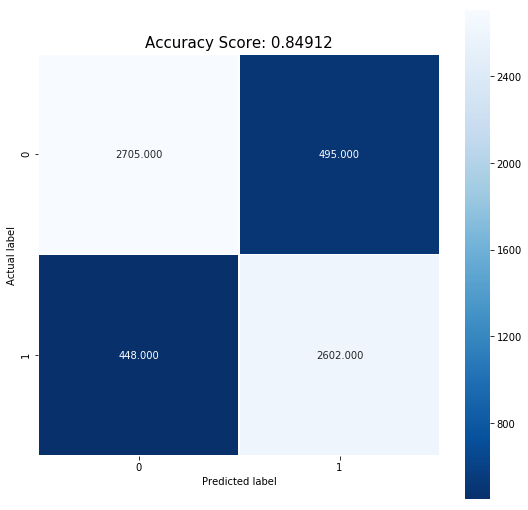

In [35]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_rfc, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_rfc)
plt.title(all_sample_title, size = 15);

## Choosing the Model and Testing Predictions

Since, logistic regression performed better than random forest classifier we will use logistic regression as prediction model for the unseen reviews from the test dataset

In [36]:
test_vectorizer = word_vectorizer.transform(test_data["clean_review"])
prediction = logistic_regression.predict(test_vectorizer)

In [37]:
test_data['sentiment'] = prediction

In [38]:
test_data.head()

id                                             review  \
0  "12311_10"  "Naturally in a film who's main themes are of ...   
1    "8348_2"  "This movie is a disaster within a disaster fi...   
2    "5828_4"  "All in all, this is a movie for kids. We saw ...   
3    "7186_2"  "Afraid of the Dark left me with the impressio...   
4   "12128_7"  "A very accurate depiction of small time mob l...   

                                        clean_review  sentiment  
0  natur film main theme mortal nostalgia loss in...          1  
1  movi disast within disast film full great acti...          0  
2  movi kid saw tonight child love one point kid ...          1  
3  afraid dark left impress sever differ screenpl...          1  
4  accur depict small time mob life film new jers...          1